<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/examples/unsupervised/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [0]:
(X_train, Y_train), (X_test, Y_test) =  tf.keras.datasets.mnist.load_data()
X_train = X_train/ 255
X_test = X_test/ 255
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2])).astype(np.float32)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2])).astype(np.float32)

In [0]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

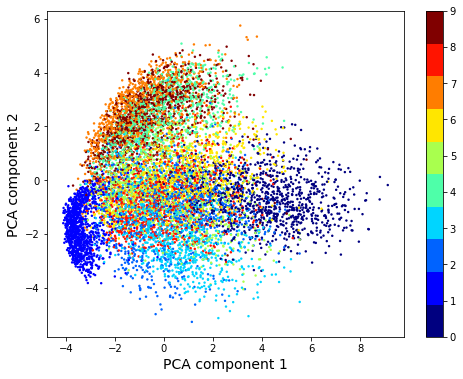

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:10000, 0], pca_result[:10000, 1], c=Y_train[:10000], edgecolor='none', alpha=1.0,
           cmap=plt.get_cmap('jet', 10), s=6)
plt.colorbar()
plt.xlabel('PCA component 1', fontsize=14)
plt.ylabel('PCA component 2', fontsize=14)
plt.show()

In [0]:
pca = PCA(200)
pca_full = pca.fit(X_train)

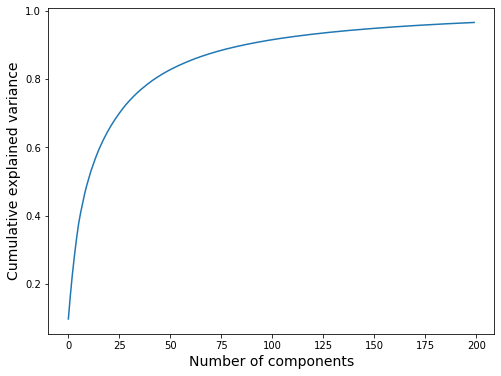

In [31]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of components', fontsize=14)
plt.ylabel('Cumulative explained variance', fontsize=14)
plt.show()
